In [18]:
import pandas as pd
import tensorflow as tf


import tensorflow as tf

from keras.layers import Dense,LSTM, Embedding, Dropout, Activation, Bidirectional

from bs4 import BeautifulSoup
import string
import numpy as np
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
print(tf.__version__)

2.5.0


In [20]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")
    
print( tf.test.gpu_device_name() )

Default GPU Device:/device:GPU:0
/device:GPU:0


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
def to_lower(word):
    result = word.lower()
    return result

def remove_special_characters(word):
    result=word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def removeHTMLtags(blob):
     soup = BeautifulSoup(blob,  "html.parser").text
     return soup


In [23]:
path_csv="/content/drive/MyDrive/BE Project All Documents/code/Phishing-dataset-decoded.csv"

train_data= pd.read_csv(path_csv)
print("Training dataset have been uploaded")
print(train_data.shape)
train_data.dropna(axis = 0, how ='any',inplace=True)

print('===========Train Data =========')
print(train_data['Class'].value_counts())
print(len(train_data))
max_len=len(train_data)
print("maxlen",max_len)
print('==============================\n\n')

train_data['Mail'] = train_data['Mail'].apply(to_lower)
train_data['Mail'] = train_data['Mail'].apply(remove_special_characters)
train_data['Mail'] = train_data['Mail'].apply(removeHTMLtags)

print('=====================================================')
print("Training Dataset after Initial steps of preprocessing")
print('=====================================================')
train_data.head()

Training dataset have been uploaded
(209, 2)
===========Train Data =========
phishing    158
ham          51
Name: Class, dtype: int64
209
maxlen 209


Training Dataset after Initial steps of preprocessing


,Class,Mail
0,phishing,from infohelpdeskorg thu mar 26 140825 2015\n...
1,phishing,from servicenonercom mon may 4 131436 2015\n\...
2,phishing,from acteamcoserver2akingcommy sat jan 24 035...
3,phishing,from rmtransservisaz wed jan 21 033032 2015\n...
4,phishing,from femish5vps3164inmotionhostingcom fri apr...


In [24]:
train, valid, train_label, valid_label =train_test_split(train_data['Mail'].tolist(),
                                                     train_data['Class'].tolist(),
                                                     test_size=0.3,
                                                     stratify = train_data['Class'].tolist(),
                                                     random_state=9)

print(train[:1])
print(valid[:1])
print(train_label[:1])
print(valid_label[:1])
print("\n")

print('Train data len:'+str(len(train)))

print('Class distribution: '+str(Counter(train_label)))
print('Valid data len:'+str(len(valid)))
print('Class distribution: '+ str(Counter(valid_label)))



['from applejosemonkeyorgmikecordlecom\xa0 tue may 5 121305 2015\n\nreturnpath applejosemonkeyorgmikecordlecom\n\nxoriginalto joseloginmonkeyorg\n\ndeliveredto joseloginmonkeyorg\n\nreceived from forwardbhostedemailcom forwardbhostedemailcom 64983617\n\n\xa0\xa0\xa0 by lmonkeyorg postfix with esmtp id 81cdbf413e\n\n\xa0\xa0\xa0 for joseloginmonkeyorg tue\xa0 5 may 2015 121305 0500 cdt\n\nreceived from smtpin05hostedemailcom 10519248rfc1918com 10519248\n\n\xa0\xa0\xa0 by ofarelay02bhostedemailcom postfix with smtp id 3370327abdd\n\n\xa0\xa0\xa0 for joseloginmonkeyorg tue\xa0 5 may 2015 171305 0000 utc\n\nxforwardedfor josemonkeyorg by hostedemail\n\ndeliveredto josemonkeyorg\n\nxfda 7015349313005lift928f3e7209d2f5a\n\nauthenticationresults authbhostedemailcom dkimpass\n\n\xa0\xa0\xa0 reason1024bit key insecure key\n\n\xa0\xa0\xa0 headerdmikecordlecom headeriapplemikecordlecom\n\n\xa0\xa0\xa0 headerbbc7slvb dkimadsppass dkimatpsneutral\n\nxspamsummary 503094ee3a54c1059e58d41d8cd98f00b204

In [25]:
max_feature = 1000 #number of unique words to consider

tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(train)
x_train_features = tokenizer.texts_to_sequences(train)
x_test_features = tokenizer.texts_to_sequences(valid)

vocab_size = len(tokenizer.word_index) + 1                          


print(train[:1])
print(x_train_features)

['from applejosemonkeyorgmikecordlecom\xa0 tue may 5 121305 2015\n\nreturnpath applejosemonkeyorgmikecordlecom\n\nxoriginalto joseloginmonkeyorg\n\ndeliveredto joseloginmonkeyorg\n\nreceived from forwardbhostedemailcom forwardbhostedemailcom 64983617\n\n\xa0\xa0\xa0 by lmonkeyorg postfix with esmtp id 81cdbf413e\n\n\xa0\xa0\xa0 for joseloginmonkeyorg tue\xa0 5 may 2015 121305 0500 cdt\n\nreceived from smtpin05hostedemailcom 10519248rfc1918com 10519248\n\n\xa0\xa0\xa0 by ofarelay02bhostedemailcom postfix with smtp id 3370327abdd\n\n\xa0\xa0\xa0 for joseloginmonkeyorg tue\xa0 5 may 2015 171305 0000 utc\n\nxforwardedfor josemonkeyorg by hostedemail\n\ndeliveredto josemonkeyorg\n\nxfda 7015349313005lift928f3e7209d2f5a\n\nauthenticationresults authbhostedemailcom dkimpass\n\n\xa0\xa0\xa0 reason1024bit key insecure key\n\n\xa0\xa0\xa0 headerdmikecordlecom headeriapplemikecordlecom\n\n\xa0\xa0\xa0 headerbbc7slvb dkimadsppass dkimatpsneutral\n\nxspamsummary 503094ee3a54c1059e58d41d8cd98f00b204

In [26]:
from keras.preprocessing.sequence import pad_sequences

x_train_features = pad_sequences(x_train_features,padding='post',maxlen=max_len)
x_test_features = pad_sequences(x_test_features,padding='post',maxlen=max_len)

x_train_features

array([[ 93, 972,  26, ..., 191,  92, 160],
       [ 70, 854, 658, ...,   0,   0,   0],
       [  8, 213, 214, ...,  62,   5, 160],
       ...,
       [ 11, 111, 556, ...,   3,  53,  29],
       [ 74,   1,   6, ..., 484,  11, 620],
       [  3, 145,  45, ...,  23, 173, 136]], dtype=int32)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_label = le.fit_transform(train_label)
valid_label = le.transform(valid_label)
print(train_label)
print(valid_label)

[1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1]
[1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1]


In [28]:
import tensorflow as tf
from keras import layers
from keras.layers import Dense,LSTM, Embedding, Dropout, Activation, Bidirectional


In [35]:
embedding_vector=32

model =tf.keras.Sequential()
model.add(tf.keras.Input(209,))
model.add(tf.keras.layers.Embedding(vocab_size, embedding_vector, input_length=max_feature))
model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())
history = model.fit(x_train_features, train_label,
                    epochs=20,
                    validation_data=(x_test_features, valid_label),
                    batch_size=120)
#x_train_features, train_label, batch_size=512, epochs=20, 
#validation_data=(x_test_features, valid_label))



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 209, 32)           464544    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 205, 128)          20608     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [36]:
valid_predict = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

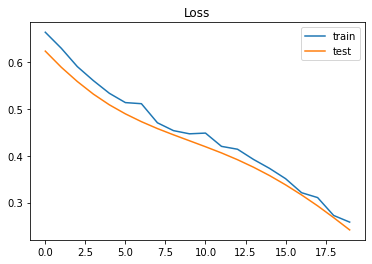

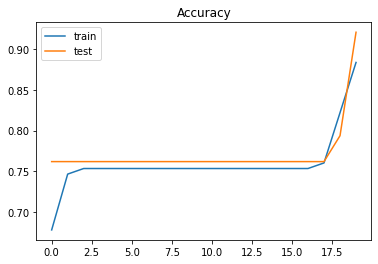

In [37]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [32]:
cf_matrix =confusion_matrix(valid_label,valid_predict)
tn, fp, fn, tp = confusion_matrix(valid_label,valid_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(valid_label, valid_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(valid_label, valid_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(valid_label,valid_predict)))

Precision: 76.19%
Recall: 100.00%
F1 Score: 86.49%


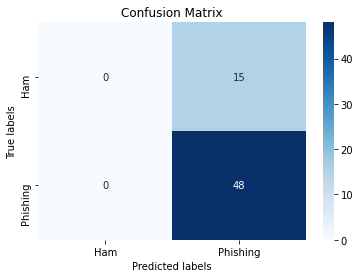

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Ham', 'Phishing']); ax.yaxis.set_ticklabels(['Ham', 'Phishing']);

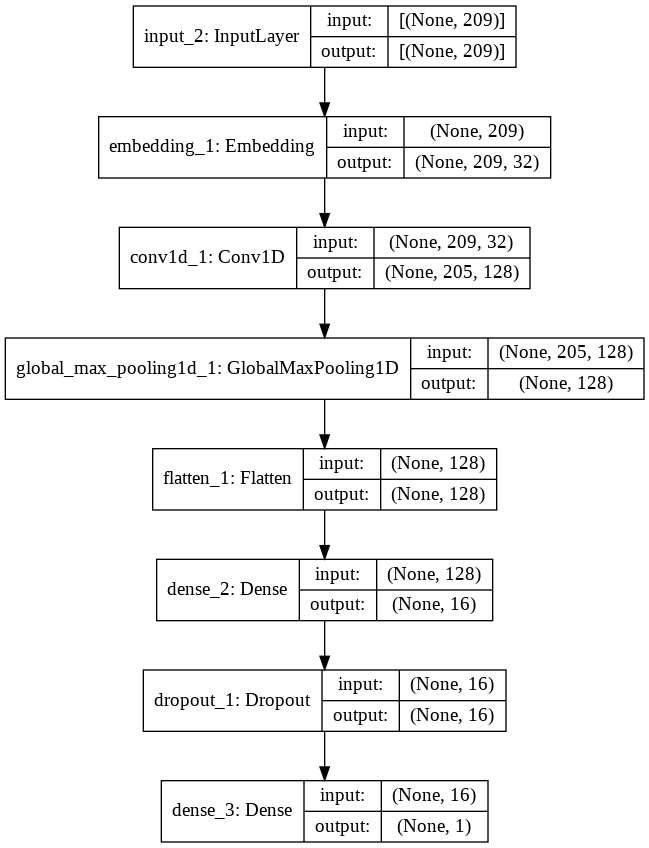

In [34]:
from tensorflow import keras
tf.keras.utils.plot_model(model, "simpleNN_model.png", show_shapes=True)

